# Assignment 2. Polynomial Regression
## Step 1. Initializing imports.

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
from scipy import stats
import math
import os
import random
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

## Step 2. Reading the dataframe.

In [4]:
df = pd.read_csv('auto-mpg.csv', header=0)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8,307.0,130,3504,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165,3693,11.5,70,1,buick skylark 320
2,18.0,8,318.0,150,3436,11.0,70,1,plymouth satellite
3,16.0,8,304.0,150,3433,12.0,70,1,amc rebel sst
4,17.0,8,302.0,140,3449,10.5,70,1,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86,2790,15.6,82,1,ford mustang gl
394,44.0,4,97.0,52,2130,24.6,82,2,vw pickup
395,32.0,4,135.0,84,2295,11.6,82,1,dodge rampage
396,28.0,4,120.0,79,2625,18.6,82,1,ford ranger


## Step 3. Constructing a correlation matrix.

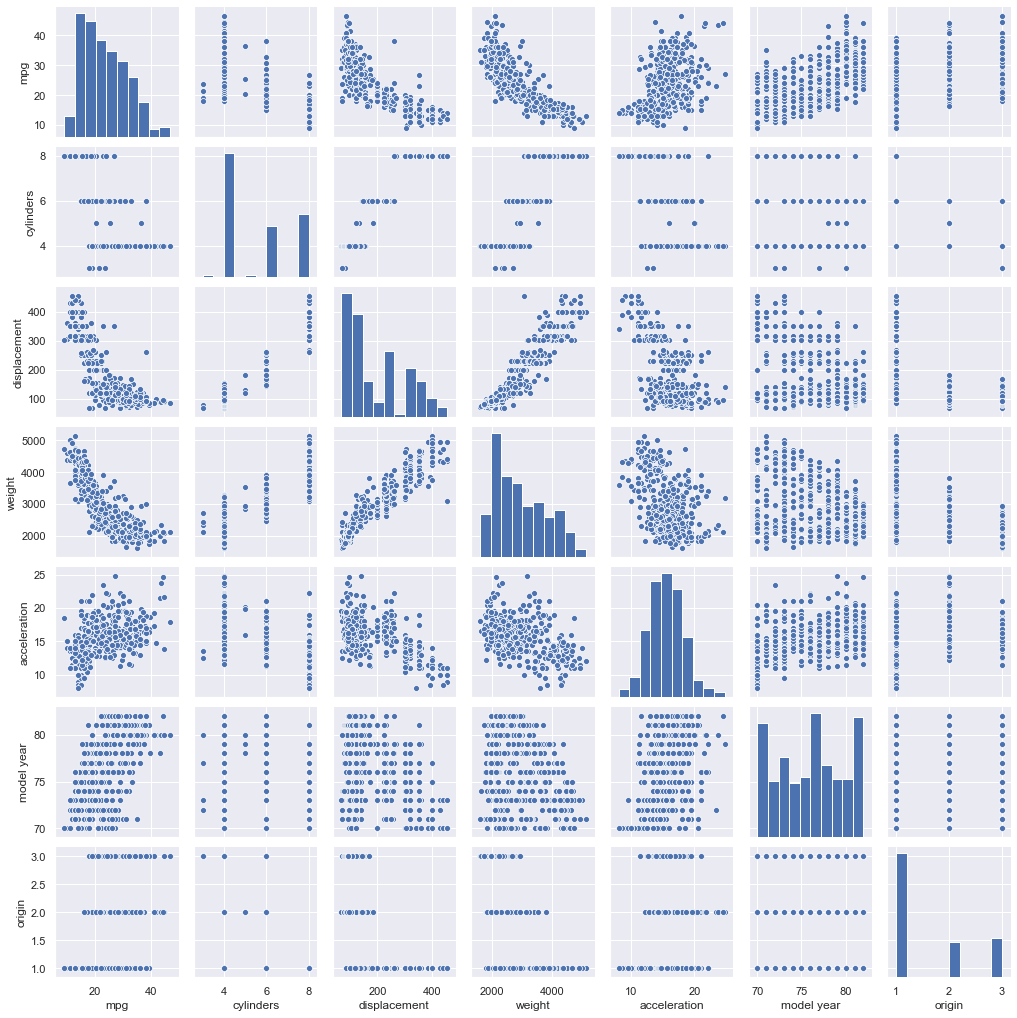

In [6]:
sns.set()
sns.pairplot(df, height = 2.0)
plt.show()

Based on the correlation matrix I have chosen the weight of the car to be the independent variable and the displacement (which is basically the engine volume, as far as I understand) as the dependent variable. We would like to know how does the weight of the car correlate with the car's engine volume.

Text(0, 0.5, 'Displacement (Engine volume)')

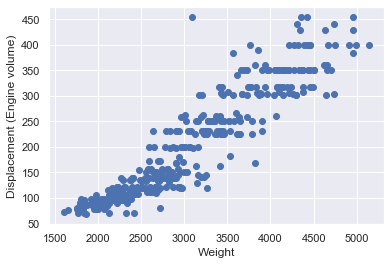

In [147]:
X = df['weight'].values
Y = df['displacement'].values
plt.scatter(X, Y)
plt.xlabel('Weight')
plt.ylabel('Displacement')

## Step 4. Fitting the regression model

In [138]:
#print(len(mpg), len(weight))
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.25)

In [148]:
X_train = X_train.reshape(-1,1)
def poly_test(param):
    pol_exp = PolynomialFeatures(degree=param)
    model = LinearRegression()
    model.fit(pol_exp.fit_transform(X_train), Y_train)
    print('The R2 score of this model on the train set is:', model.score(pol_exp.fit_transform(X_train), Y_train))
    print('The mean squared error of this model on the train set is:', mean_squared_error(model.predict(pol_exp.fit_transform(X_train)), Y_train))
    x = np.linspace(X_train.min(), X_train.max(), 100).reshape(-1,1) 
    plt.plot(X_train, Y_train, 'o')
    plt.plot(x, model.predict(pol_exp.fit_transform(x)), color='red') 
    plt.xlabel('Weight')
    plt.ylabel('Displacement')
    plt.show()

## Step 5. Visualizing the findings.

The R2 score of this model on the train set is: 0.869225049892749
The mean squared error of this model on the train set is: 1451.9372248793345


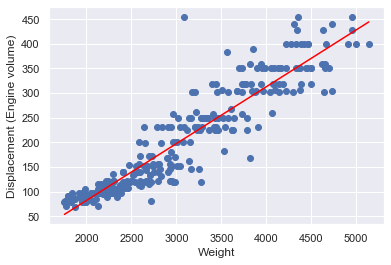

In [149]:
poly_test(1)

The R2 score of this model on the train set is: 0.8694995270122796
The mean squared error of this model on the train set is: 1448.8898251525725


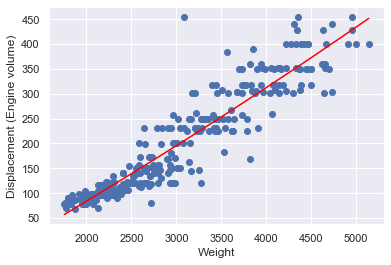

In [150]:
poly_test(2)

The R2 score of this model on the train set is: 0.8776217701318526
The mean squared error of this model on the train set is: 1358.7121028505837


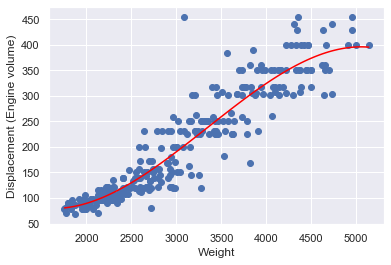

In [151]:
poly_test(3)

The R2 score of this model on the train set is: 0.8780782269726544
The mean squared error of this model on the train set is: 1353.6442616610643


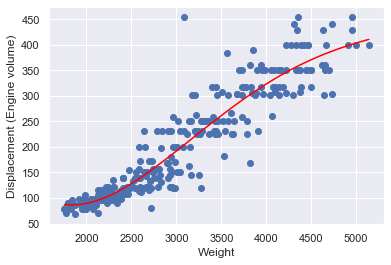

In [152]:
poly_test(4)

The R2 score of this model on the train set is: 0.8782294039635841
The mean squared error of this model on the train set is: 1351.9658094766348


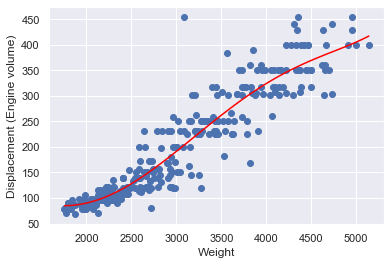

In [153]:
poly_test(5)

The R2 score of this model on the train set is: 0.8782285415382362
The mean squared error of this model on the train set is: 1351.9753846090687


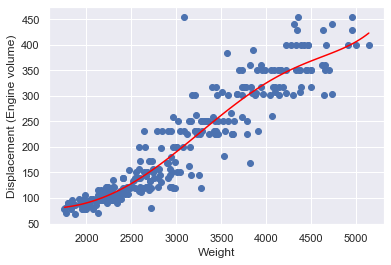

In [154]:
poly_test(6)

The R2 score of this model on the train set is: 0.8781094251229907
The mean squared error of this model on the train set is: 1353.2978822070215


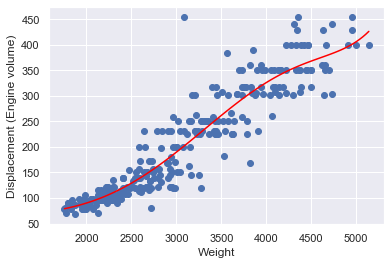

In [155]:
poly_test(7)

## Step 6. Conclusion.
We can see that the model has a high $R^2$ score (above 0.86) with any degree from 1 to 7. The mean squared error is quite high (the mean error is almost 37). It probably happens because in the area with weight < 3000 and displacement < 200 there are much more data points and they are closer to the prediction than in the rest of the model. The best choice of the degree would be 5, which gives the highest $R^2$ score and the lowest mean squared error.